In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
data = pd.read_csv('archive GOT/character-deaths.csv')
data.rename(columns={'Book of Death': 'Book_of_Death'}, inplace=True)
data.Book_of_Death = data.Book_of_Death.astype('str')

In [3]:
data_no_na = data.dropna()
data_no_na.head()

,Name,Allegiances,Death Year,Book_of_Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
3,Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1
6,Aemon Targaryen (son of Maekar I),Night's Watch,300.0,4.0,35.0,21.0,1,1,1,0,1,1,0
10,Aggar,House Greyjoy,299.0,2.0,56.0,50.0,1,0,0,1,0,0,0
12,Alan of Rosby,Night's Watch,300.0,5.0,4.0,18.0,1,1,0,1,1,0,1


In [4]:
got_train, got_test = train_test_split(data_no_na, test_size=0.3, random_state=42, stratify=data_no_na['Book_of_Death'])
print(got_train.shape, got_test.shape)

(204, 13) (88, 13)


In [5]:
features= ['Death Year', 'Death Chapter']
dt_classification = DecisionTreeClassifier(max_depth = 10) # Increase max_depth to see effect in the plot
dt_classification.fit(got_train[features], got_train['Book_of_Death'])

DecisionTreeClassifier(max_depth=10)

In [6]:
def calculate_accuracy(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (predictions == actuals).sum() / len(actuals)

In [7]:
predictionsOnTrainset = dt_classification.predict(got_train[features])
predictionsOnTestset = dt_classification.predict(got_test[features])

accuracyTrain = calculate_accuracy(predictionsOnTrainset, got_train.Book_of_Death)
accuracyTest = calculate_accuracy(predictionsOnTestset, got_test.Book_of_Death)

print("Accuracy on training set " + str(accuracyTrain))
print("Accuracy on test set " + str(accuracyTest))

Accuracy on training set 0.8676470588235294
Accuracy on test set 0.7272727272727273


In [8]:
from sklearn import tree
import graphviz

def plot_tree_classification(model, features, class_names):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          class_names=class_names,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

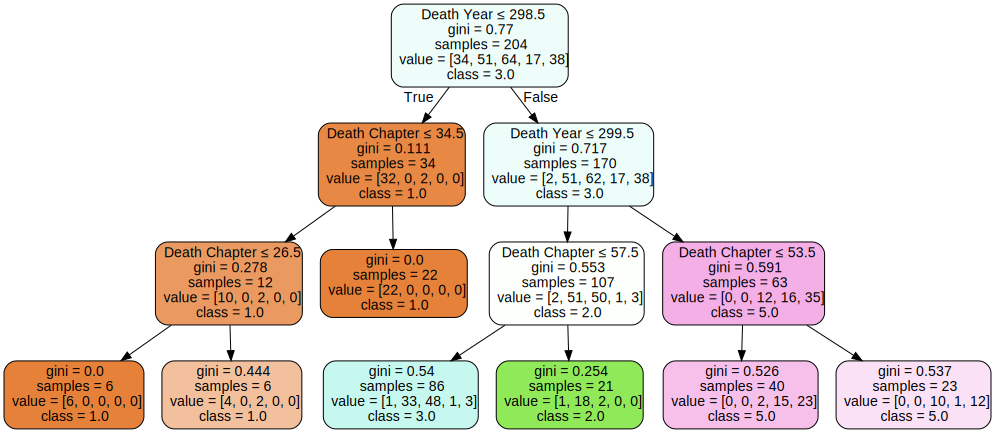

In [9]:
dt = DecisionTreeClassifier(max_depth = 3)
dt.fit(got_train[features], got_train['Book_of_Death'])
plot_tree_classification(dt, features, np.sort(data_no_na.Book_of_Death.unique()))